In [2]:
import numpy as np

from wrapper4 import SolverTSX
from denormalize import plot_observations_vs_reference, create_denormalizer_tsx_9subdomains

In [3]:
prior = create_denormalizer_tsx_9subdomains()

In [4]:
no_subdomains = 9
no_parameters = no_subdomains*4+3 # 36
no_observations = 2*18*4  # 144

# create solver instance
solver_instance = SolverTSX()

In [5]:
import h5py

# Load the data from HDF5 file
with h5py.File('subset_inputs_outputs.h5', 'r') as file:
    inputs = file['inputs'][:]
    outputs = file['outputs'][:]

# Print shapes to verify the loaded data
print(f"Inputs shape: {inputs.shape}")
print(f"Outputs shape: {outputs.shape}")

Inputs shape: (435, 39)
Outputs shape: (435, 144)


0.024152999386092378


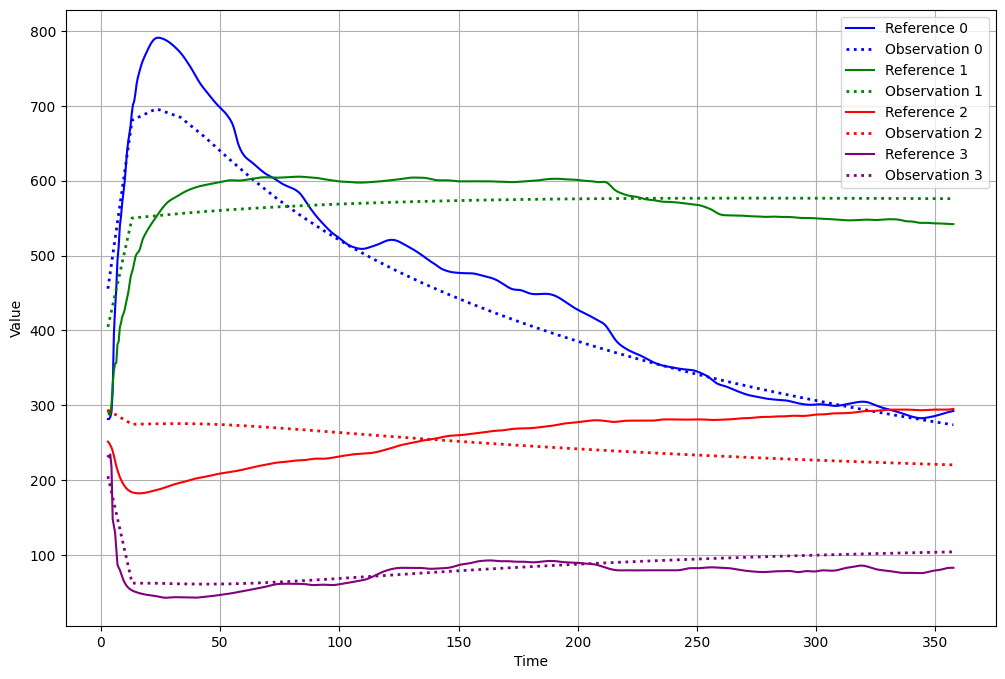

0.031013281886102306


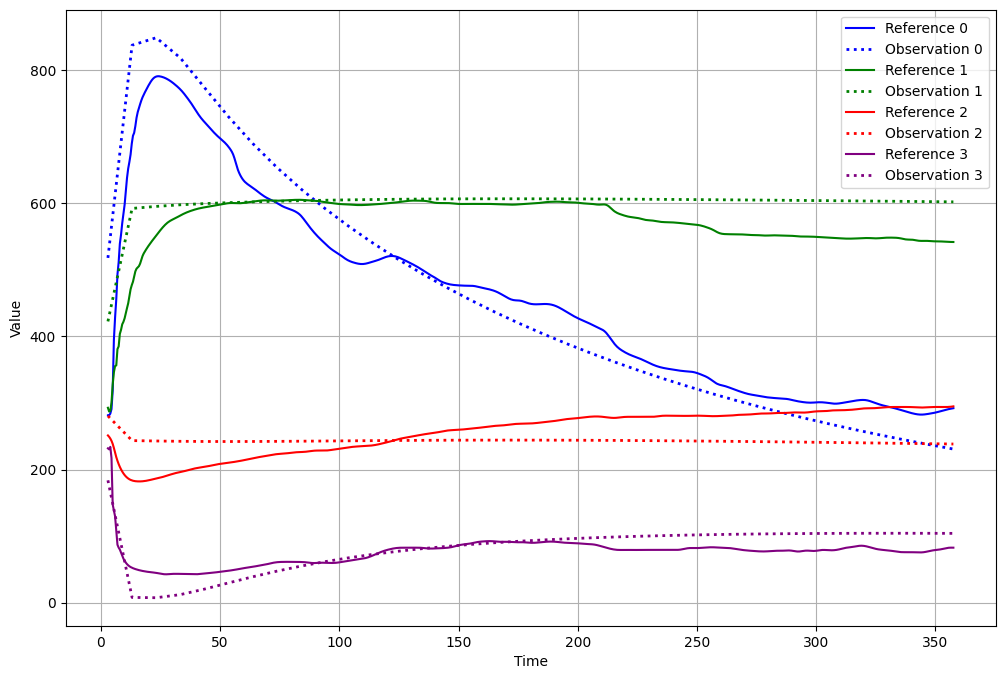

0.022367330873363116


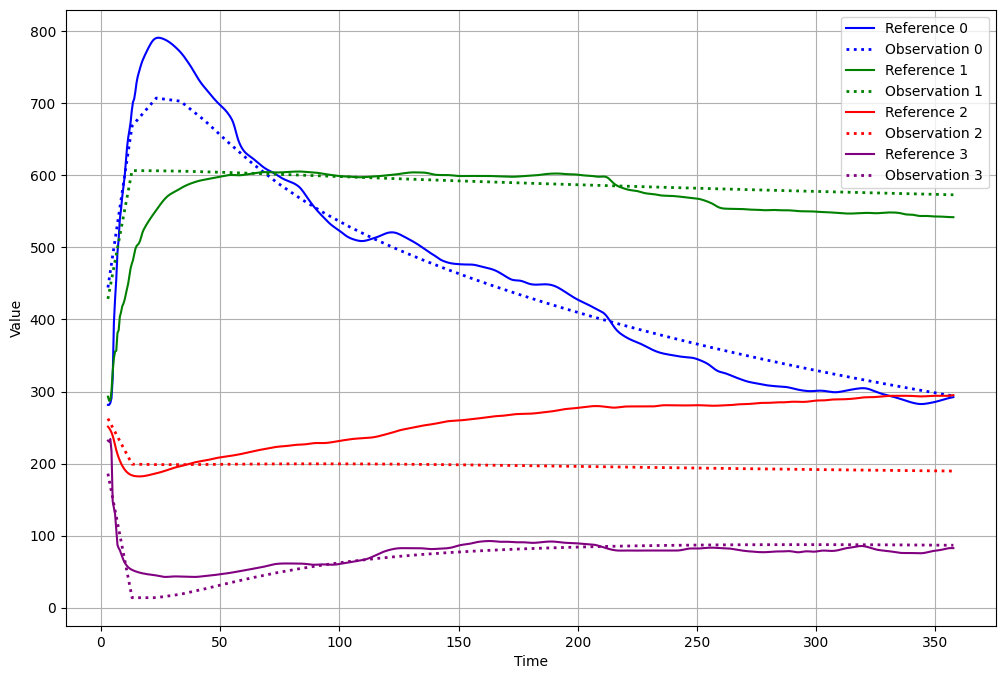

0.013317307872682224


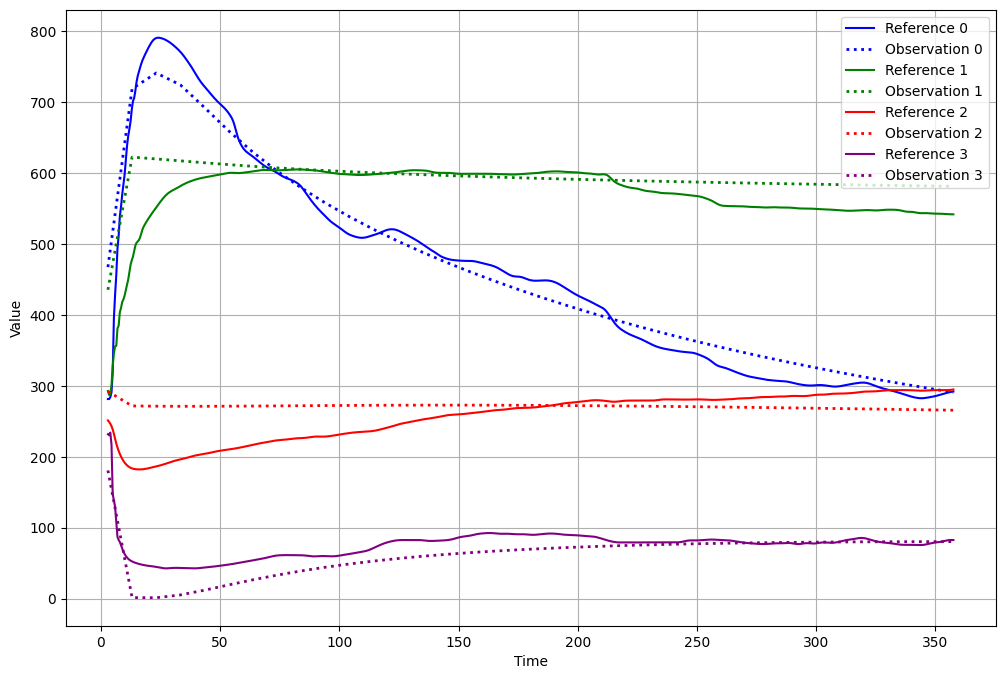

0.012264422890789165


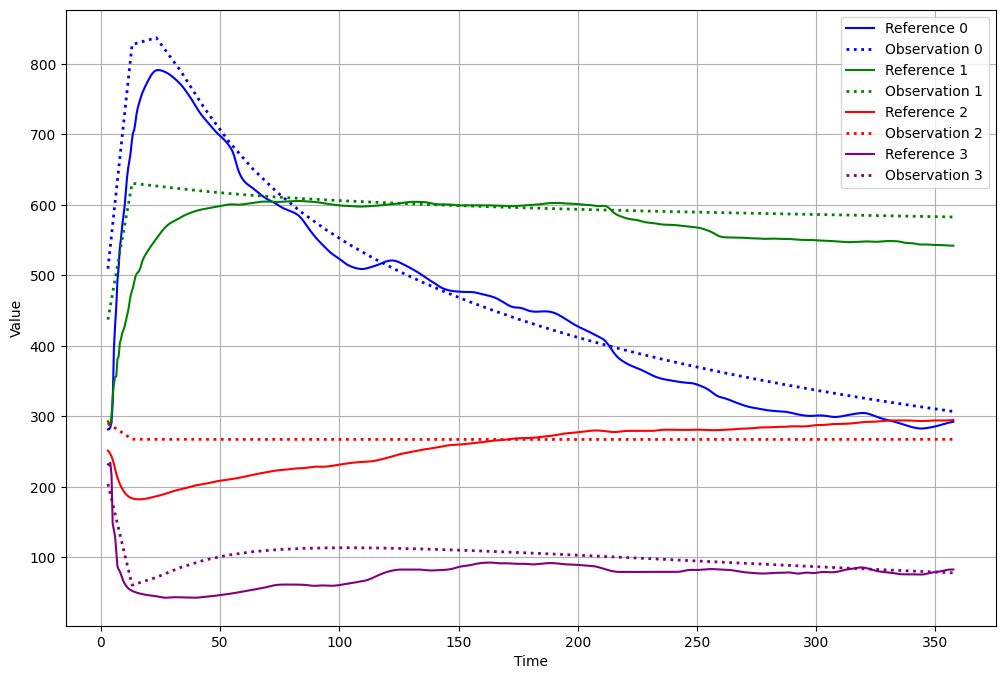

0.019767819591607193


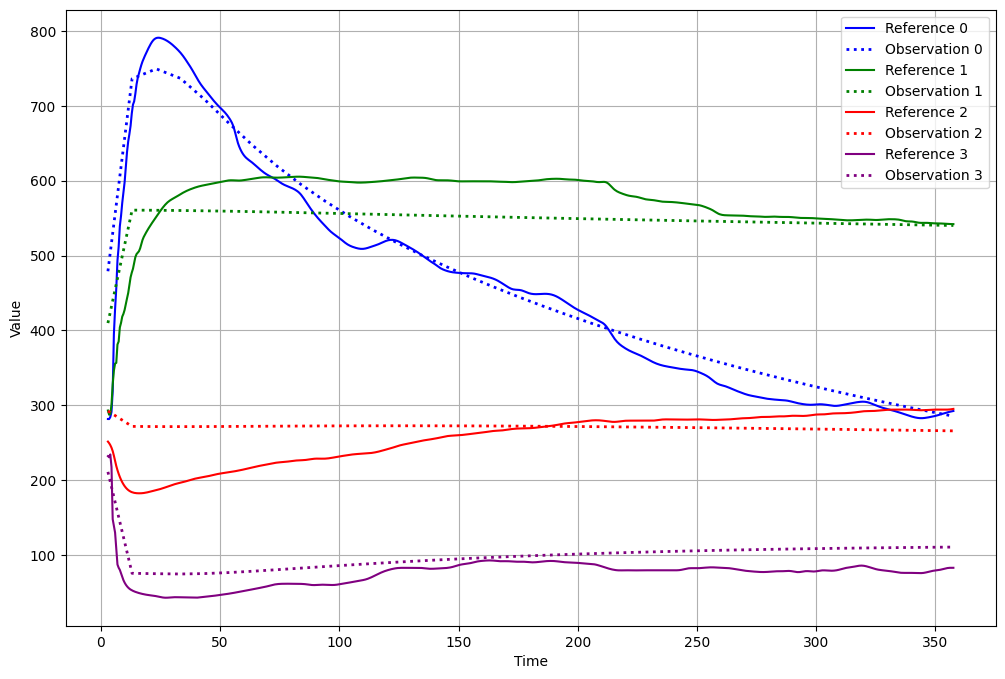

0.01538348411102288


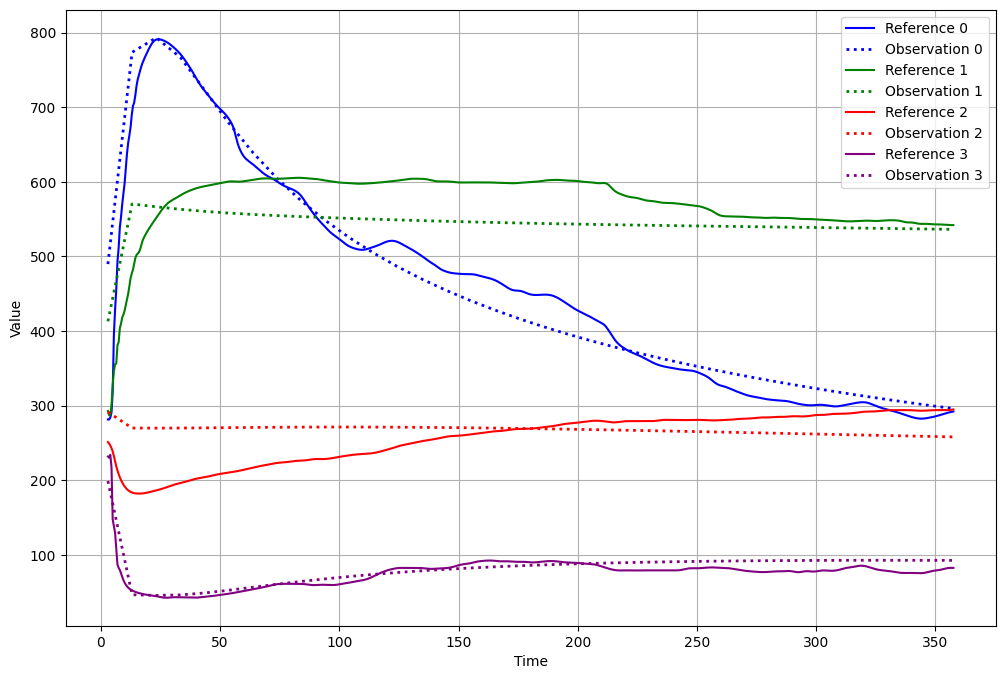

0.009540789779708474


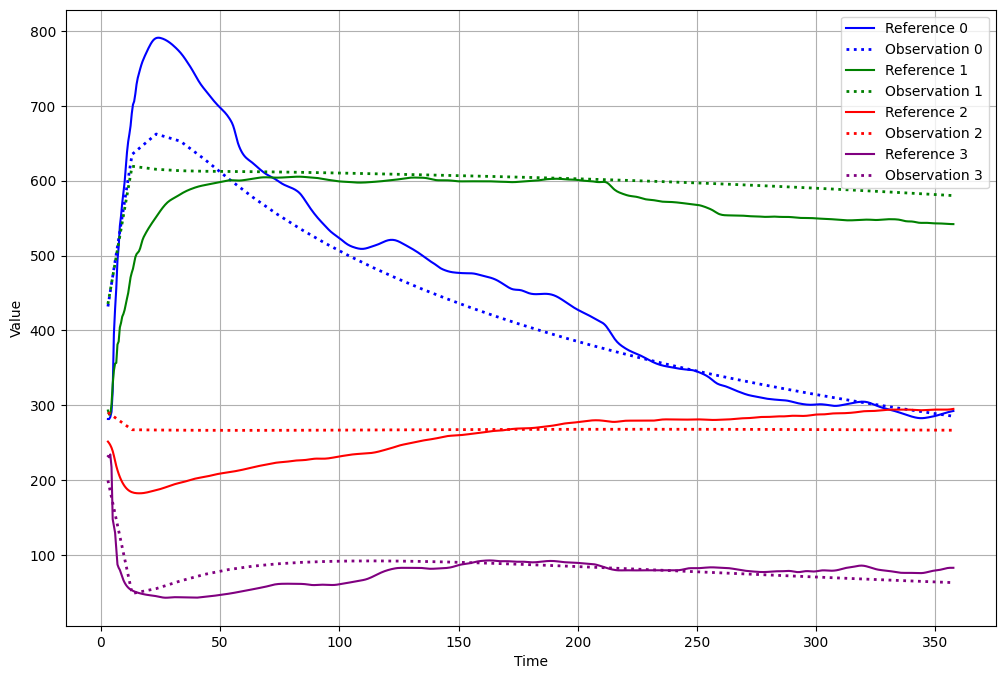

0.017201271180774517


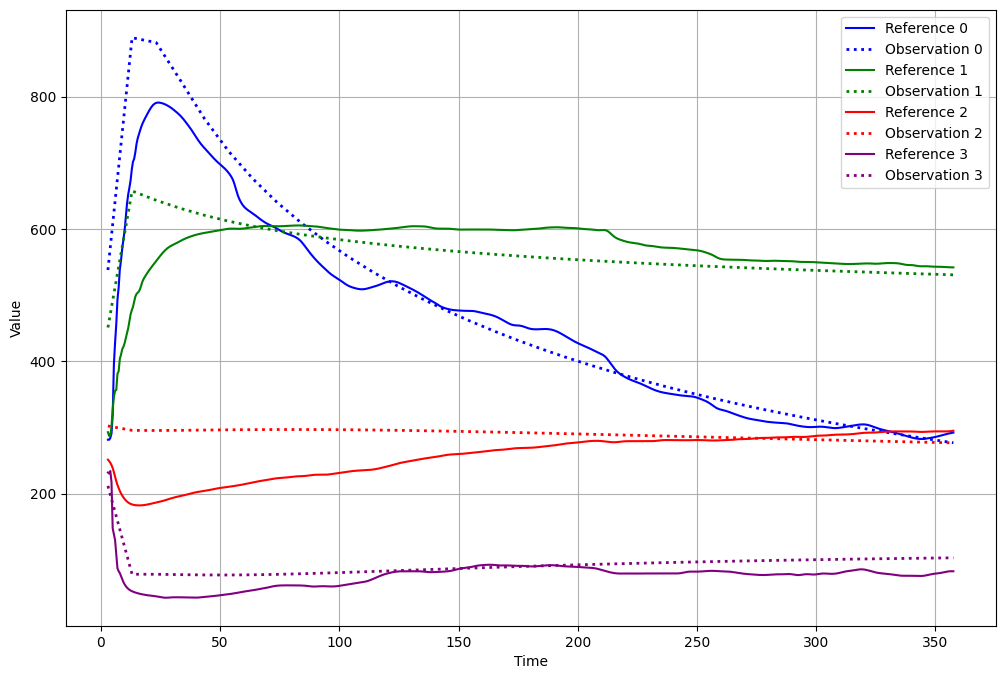

0.01557749422433196


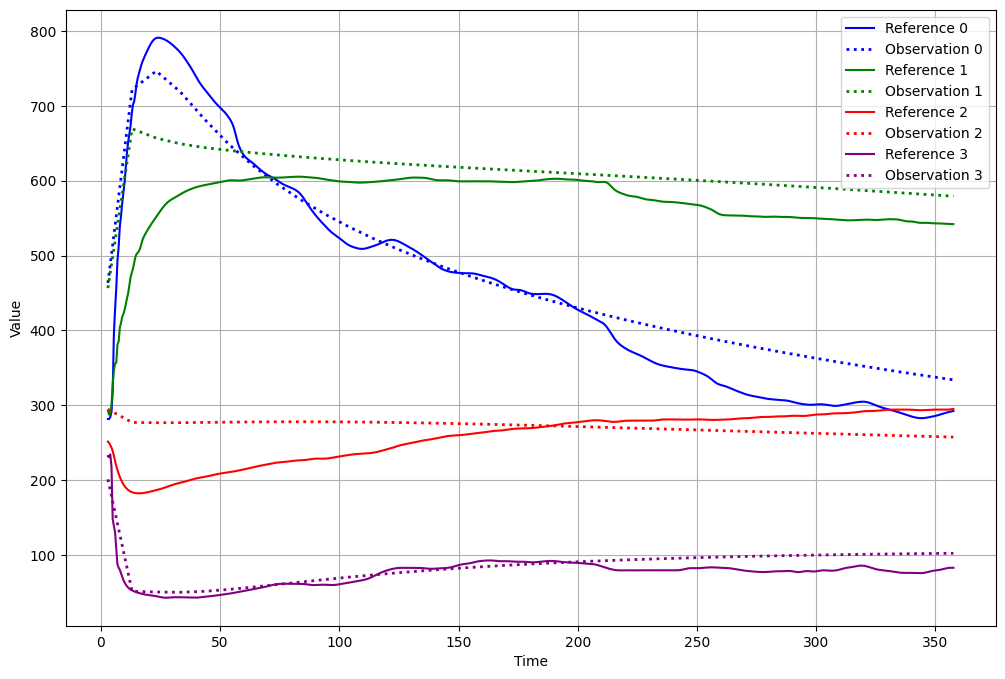

In [7]:
for i in range(10):
    parameter_estimates = inputs[i, :]
    solver_instance.set_parameters(prior.transform(parameter_estimates))
    solver_output = solver_instance.get_observations()
    print(np.linalg.norm(solver_output - outputs[i, :]))
    fig = plot_observations_vs_reference(solver_output)
